Build a neural network to predict housing prices based on the features provided in the USA Real Estate Dataset. 

Your goal is to design, implement, and evaluate a predictive model using the given data.

In [68]:
# !kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

In [ ]:
import kaggle
import pandas as pd

# Download the dataset
kaggle.api.dataset_download_file('ahmedshahriarsakib/usa-real-estate-dataset', 'realtor-data.zip.csv')

# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('realtor-data.zip', 'r') as zip_ref:
    zip_ref.extractall('Task 3')

# Load the CSV into a DataFrame
df = pd.read_csv('Task 3/realtor-data.zip.csv')

# Display the first few rows
print(df.head())

In [ ]:
# import pandas as pd # type: ignore

# csv_file = 'realtor-data.csv'  # Replace with the actual CSV file name
# df = pd.read_csv(csv_file)

# # Display the first few rows of the dataframe
# print(df.head())


   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


## EDA

In [70]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [71]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [73]:
# Check for missing values
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

### Data Cleaning and Preprocessing

Convert Columns to Appropriate Data Types

In [74]:
# Convert `prev_sold_date` to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Convert `brokered_by` to categorical (or int if needed)
df['brokered_by'] = df['brokered_by'].astype('category')

# Convert `state`, `city`, and `status` to categorical
df['state'] = df['state'].astype('category')
df['city'] = df['city'].astype('category')
df['status'] = df['status'].astype('category')

Fill Missing Values

broker_by

In [75]:
# Drop rows where 'brokered_by' is NaN
df.dropna(subset=['brokered_by'], inplace=True)

# Check the result
print(df.isnull().sum())  # Check for remaining missing values

brokered_by            0
status                 0
price               1541
bed               479604
bath              510032
acre_lot          325105
street             10849
city                1397
state                  8
zip_code             299
house_size        566630
prev_sold_date    733377
dtype: int64


In [76]:
# Proceed with other missing value handling
df['price'] = df['price'].fillna(df['price'].median())
df['bed'] = df['bed'].fillna(df['bed'].median())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['acre_lot'] = df['acre_lot'].fillna(df['acre_lot'].median())
df['house_size'] = df['house_size'].fillna(df['house_size'].median())

In [77]:
# Check the result
print(df.isnull().sum())  # Check for remaining missing values

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street             10849
city                1397
state                  8
zip_code             299
house_size             0
prev_sold_date    733377
dtype: int64


In [78]:
# Fill missing 'street', 'city', 'zip_code' with the most frequent value (mode)
df['street'] = df['street'].fillna(df['street'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])
df['zip_code'] = df['zip_code'].fillna(df['zip_code'].mode()[0])

In [79]:
# Check the result
print(df.isnull().sum())  # Check for remaining missing values

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  8
zip_code               0
house_size             0
prev_sold_date    733377
dtype: int64


In [80]:
# Drop the 'prev_sold_date' column due to excessive missing values
df.drop(columns=['prev_sold_date'], inplace=True)

In [81]:
# Check the result
print(df.isnull().sum())  # Check for remaining missing values

brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
street         0
city           0
state          8
zip_code       0
house_size     0
dtype: int64


In [82]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1760.0


## Data Exploration & Understanding

Check for outliers: Identify any outliers in numerical columns like price, acre_lot, or house_size.


Visualize data: Create plots (e.g., histograms, scatter plots, and correlation matrices) to understand relationships between variables.

Outliers in price: 171236 rows
Outliers in acre_lot: 366353 rows
Outliers in house_size: 190432 rows


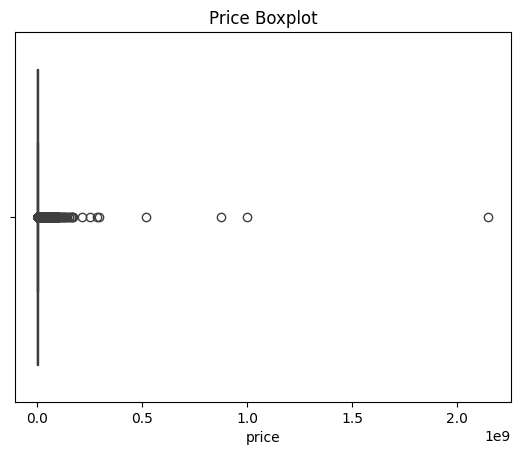

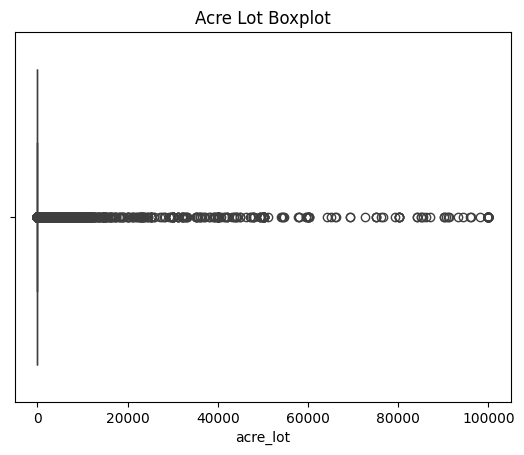

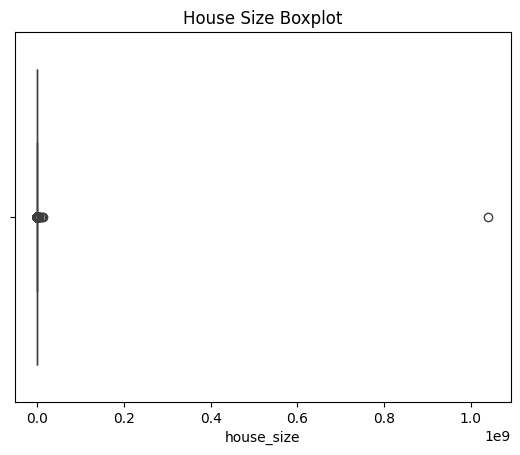

Outliers in price (Z-score method): 8190 rows
Outliers in acre_lot (Z-score method): 1066 rows
Outliers in house_size (Z-score method): 6 rows


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame

# 1. **Boxplot (IQR Method)**

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in 'price', 'acre_lot', and 'house_size'
outliers_price = detect_outliers_iqr(df, 'price')
outliers_acre_lot = detect_outliers_iqr(df, 'acre_lot')
outliers_house_size = detect_outliers_iqr(df, 'house_size')

print(f"Outliers in price: {outliers_price.shape[0]} rows")
print(f"Outliers in acre_lot: {outliers_acre_lot.shape[0]} rows")
print(f"Outliers in house_size: {outliers_house_size.shape[0]} rows")

# Visualizing boxplots
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()

sns.boxplot(x=df['acre_lot'])
plt.title('Acre Lot Boxplot')
plt.show()

sns.boxplot(x=df['house_size'])
plt.title('House Size Boxplot')
plt.show()


# 2. **Z-score Method**

def detect_outliers_zscore(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > 3]  # Z-score threshold set to 3
    return outliers

# Detect outliers using Z-scores
outliers_price_zscore = detect_outliers_zscore(df, 'price')
outliers_acre_lot_zscore = detect_outliers_zscore(df, 'acre_lot')
outliers_house_size_zscore = detect_outliers_zscore(df, 'house_size')

print(f"Outliers in price (Z-score method): {outliers_price_zscore.shape[0]} rows")
print(f"Outliers in acre_lot (Z-score method): {outliers_acre_lot_zscore.shape[0]} rows")
print(f"Outliers in house_size (Z-score method): {outliers_house_size_zscore.shape[0]} rows")

Dropping outliners

In [84]:
threshold_price = 1.5 * (10 ** 9)
threshold_house_size = 2 * (10 ** 8)

# Filter rows where price is greater than threshold
rows_with_price_gt_threshold_price = df[df['price'] > threshold_price]
rows_with_price_gt_threshold_house_size = df[df['house_size'] > threshold_house_size]

# Print the rows with price greater than threshold
print("Rows with price greater than", threshold_price)
print(rows_with_price_gt_threshold_price)

print("Rows with price greater than", threshold_house_size)
print(rows_with_price_gt_threshold_house_size)

# Drop rows from the original DataFrame
df_dropped = df[df['price'] <= threshold_price]
df_dropped = df[df['house_size'] <= threshold_house_size]


Rows with price greater than 1500000000.0
       brokered_by    status         price  bed  bath  acre_lot   street  \
221994     23826.0  for_sale  2.147484e+09  2.0   2.0      0.12  11355.0   

                 city       state  zip_code  house_size  
221994  International  California   33981.0       885.0  
Rows with price greater than 200000000
        brokered_by    status     price  bed  bath  acre_lot     street  \
1213684     32859.0  for_sale  160000.0  3.0   2.0      0.26  1133380.0   

          city    state  zip_code    house_size  
1213684  Tacna  Arizona   85352.0  1.040400e+09  


## Data Preprocessing

Encode categorical variables: status, city and state are categorical variables. but city and state will get us curse of dimentionality


One-hot encoding: Useful when categorical variables are non-ordinal and have many unique values.

In [90]:
# Perform One-Hot Encoding for 'status' and create dummy columns
df = pd.get_dummies(df, columns=['status'], drop_first=False)

# Print the DataFrame with new dummy columns for 'status'
print(df.head())

  brokered_by     price       bed      bath      acre_lot     street  \
0    103378.0  0.000049  0.004237  0.001206  1.200000e-06  1962661.0   
1     52707.0  0.000037  0.006356  0.001206  8.000000e-07  1902874.0   
2    103379.0  0.000031  0.002119  0.000000  1.500000e-06  1404990.0   
3     31239.0  0.000068  0.006356  0.001206  1.000000e-06  1947675.0   
4     34632.0  0.000030  0.010593  0.001206  5.000000e-07   331151.0   

         city        state  zip_code    house_size  price_per_sqft  \
0    Adjuntas  Puerto Rico     601.0  8.804303e-07       55.534706   
1    Adjuntas  Puerto Rico     601.0  1.463859e-06       25.448415   
2  Juana Diaz  Puerto Rico     795.0  7.151093e-07       43.628725   
3       Ponce  Puerto Rico     731.0  1.726258e-06       39.114008   
4    Mayaguez  Puerto Rico     680.0  1.687812e-06       17.933270   

   lot_size_ratio  status_for_sale  status_ready_to_build  status_sold  
0        1.362970             True                  False        False  


city, state, zip code - label encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
df['city'] = label_encoder.fit_transform(df['city'])
df['state'] = label_encoder.fit_transform(df['state'])
df['zip_code'] = label_encoder.fit_transform(df['zip_code'])


In [99]:
df.shape

(2221849, 15)

Feature scaling:

Features like price, bed, bath, acre_lot, house_size are continuous variables. You might want to normalize or standardize these to ensure they are on the same scale, especially if you're using distance-based algorithms (e.g., KNN, SVM).
For algorithms like decision trees or random forests, feature scaling is generally not necessary, but for linear regression or neural networks, it's recommended.

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Columns to normalize
cols_to_normalize = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

# Apply normalization
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print(df.head())

  brokered_by     price       bed      bath      acre_lot     street   city  \
0    103378.0  0.000049  0.004237  0.001206  1.200000e-06  1962661.0     92   
1     52707.0  0.000037  0.006356  0.001206  8.000000e-07  1902874.0     92   
2    103379.0  0.000031  0.002119  0.000000  1.500000e-06  1404990.0   8788   
3     31239.0  0.000068  0.006356  0.001206  1.000000e-06  1947675.0  14313   
4     34632.0  0.000030  0.010593  0.001206  5.000000e-07   331151.0  10936   

   state  zip_code    house_size  price_per_sqft  lot_size_ratio  \
0     41         1  8.804303e-07       55.534706        1.362970   
1     41         1  1.463859e-06       25.448415        0.546501   
2     41        95  7.151093e-07       43.628725        2.097581   
3     41        67  1.726258e-06       39.114008        0.579288   
4     41        39  1.687812e-06       17.933270        0.296242   

   status_for_sale  status_ready_to_build  status_sold  
0             True                  False        False  
1 

Feature engineering:

Price per square foot: You can create a new feature like price_per_sqft = price / house_size to better capture the relationship between price and house size.

Lot size ratio: The ratio of acre_lot to house_size might be a useful feature to capture the relationship between lot size and house size.

In [101]:
# Create 'price_per_sqft' feature
df['price_per_sqft'] = df['price'] / df['house_size']

# Create 'lot_size_ratio' feature
df['lot_size_ratio'] = df['acre_lot'] / df['house_size']

# Print the first few rows to verify the new features
print(df[['price', 'house_size', 'price_per_sqft', 'acre_lot', 'lot_size_ratio']].head())

      price    house_size  price_per_sqft      acre_lot  lot_size_ratio
0  0.000049  8.804303e-07       55.534706  1.200000e-06        1.362970
1  0.000037  1.463859e-06       25.448415  8.000000e-07        0.546501
2  0.000031  7.151093e-07       43.628725  1.500000e-06        2.097581
3  0.000068  1.726258e-06       39.114008  1.000000e-06        0.579288
4  0.000030  1.687812e-06       17.933270  5.000000e-07        0.296242


In [102]:
df.head()

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft,lot_size_ratio,status_for_sale,status_ready_to_build,status_sold
0,103378.0,0.000049,0.004237,0.001206,1.200000e-06,1962661.0,92,41,1,8.804303e-07,55.534706,1.362970,True,False,False
1,52707.0,0.000037,0.006356,0.001206,8.000000e-07,1902874.0,92,41,1,1.463859e-06,25.448415,0.546501,True,False,False
2,103379.0,0.000031,0.002119,0.000000,1.500000e-06,1404990.0,8788,41,95,7.151093e-07,43.628725,2.097581,True,False,False
3,31239.0,0.000068,0.006356,0.001206,1.000000e-06,1947675.0,14313,41,67,1.726258e-06,39.114008,0.579288,True,False,False
4,34632.0,0.000030,0.010593,0.001206,5.000000e-07,331151.0,10936,41,39,1.687812e-06,17.933270,0.296242,True,False,False


## Train-Test Split

In [103]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('price', axis=1) 
y = df['price'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1777479, 14)
Test set shape: (444370, 14)


## NN Model

In [109]:
print(X_train.dtypes)


brokered_by              category
bed                       float64
bath                      float64
acre_lot                  float64
street                    float64
city                        int64
state                       int64
zip_code                    int64
house_size                float64
price_per_sqft            float64
lot_size_ratio            float64
status_for_sale              bool
status_ready_to_build        bool
status_sold                  bool
dtype: object


In [111]:
# Ensure that 'brokered_by' is treated as a numeric column (float)
X_train['brokered_by'] = X_train['brokered_by'].astype(float)
X_test['brokered_by'] = X_test['brokered_by'].astype(float)

In [116]:
df.head()

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft,lot_size_ratio,status_for_sale,status_ready_to_build,status_sold
0,103378.0,0.000049,0.004237,0.001206,1.200000e-06,1962661.0,92,41,1,8.804303e-07,55.534706,1.362970,True,False,False
1,52707.0,0.000037,0.006356,0.001206,8.000000e-07,1902874.0,92,41,1,1.463859e-06,25.448415,0.546501,True,False,False
2,103379.0,0.000031,0.002119,0.000000,1.500000e-06,1404990.0,8788,41,95,7.151093e-07,43.628725,2.097581,True,False,False
3,31239.0,0.000068,0.006356,0.001206,1.000000e-06,1947675.0,14313,41,67,1.726258e-06,39.114008,0.579288,True,False,False
4,34632.0,0.000030,0.010593,0.001206,5.000000e-07,331151.0,10936,41,39,1.687812e-06,17.933270,0.296242,True,False,False


In [115]:
X_train.head()

,brokered_by,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft,lot_size_ratio,status_for_sale,status_ready_to_build,status_sold
1536610,56995.0,0.002119,0.001206,0.000003,1713413.0,11074,50,6407,0.000001,210.561349,2.044627,False,False,True
911475,44679.0,0.004237,0.001206,0.000004,739618.0,16498,26,20209,0.000002,6.318029,2.310684,True,False,False
300557,22313.0,0.006356,0.002413,0.000006,829729.0,8449,43,8929,0.000003,82.648606,2.232305,True,False,False
748775,79759.0,0.004237,0.001206,0.000010,869225.0,8590,23,15131,0.000001,44.166652,7.295935,True,False,False
1385992,101304.0,0.004237,0.001206,0.000001,675314.0,1283,39,29549,0.000001,180.981741,1.046380,True,False,False


In [117]:
X_test.head()

,brokered_by,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft,lot_size_ratio,status_for_sale,status_ready_to_build,status_sold
1565788,33474.0,0.008475,0.004825,6.000000e-07,707481.0,881,21,6186,0.000003,78.888788,0.231543,False,False,True
1659744,52608.0,0.006356,0.002413,5.600000e-06,1499559.0,10393,10,9522,0.000002,55.763605,2.682432,False,False,True
516464,51581.0,0.004237,0.001206,5.930000e-05,1927657.0,14172,9,10289,0.000002,96.563764,35.134250,True,False,False
9183,22611.0,0.004237,0.001206,2.200000e-06,1470652.0,7553,6,1699,0.000001,91.723486,1.836983,True,False,False
31546,30807.0,0.004237,0.001206,3.130000e-05,1938406.0,15654,20,1368,0.000002,7.973408,18.544722,True,False,False


In [119]:
print(np.isnan(X_train).sum(), np.isinf(X_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())


brokered_by              0
bed                      0
bath                     0
acre_lot                 0
street                   0
city                     0
state                    0
zip_code                 0
house_size               0
price_per_sqft           0
lot_size_ratio           0
status_for_sale          0
status_ready_to_build    0
status_sold              0
dtype: int64 brokered_by              0
bed                      0
bath                     0
acre_lot                 0
street                   0
city                     0
state                    0
zip_code                 0
house_size               0
price_per_sqft           1
lot_size_ratio           1
status_for_sale          0
status_ready_to_build    0
status_sold              0
dtype: int64
0 0


In [120]:
print(np.isnan(X_train).sum(), np.isinf(X_train).sum())
print(np.isnan(y_train).sum(), np.isinf(y_train).sum())


brokered_by              0
bed                      0
bath                     0
acre_lot                 0
street                   0
city                     0
state                    0
zip_code                 0
house_size               0
price_per_sqft           0
lot_size_ratio           0
status_for_sale          0
status_ready_to_build    0
status_sold              0
dtype: int64 brokered_by              0
bed                      0
bath                     0
acre_lot                 0
street                   0
city                     0
state                    0
zip_code                 0
house_size               0
price_per_sqft           1
lot_size_ratio           1
status_for_sale          0
status_ready_to_build    0
status_sold              0
dtype: int64
0 0


In [121]:
X_train['price_per_sqft'].fillna(X_train['price_per_sqft'].mean(), inplace=True)
X_train['lot_size_ratio'].fillna(X_train['lot_size_ratio'].mean(), inplace=True)

X_test['price_per_sqft'].fillna(X_test['price_per_sqft'].mean(), inplace=True)
X_test['lot_size_ratio'].fillna(X_test['lot_size_ratio'].mean(), inplace=True)

/var/folders/9p/w_12n2k16vbfb9yq1qvydcch0000gn/T/ipykernel_18496/2046541378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['price_per_sqft'].fillna(X_train['price_per_sqft'].mean(), inplace=True)
/var/folders/9p/w_12n2k16vbfb9yq1qvydcch0000gn/T/ipykernel_18496/2046541378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()

# Input layer (same size as the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (since this is a regression problem, we use linear activation)
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer, a smaller learning rate, and gradient clipping
optimizer = Adam(learning_rate=0.00001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Print model summary to check architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

/Users/gojo/Documents/GitHub/Sameer_Take_Home_Assignment/tf-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
55547/55547 ━━━━━━━━━━━━━━━━━━━━ 18s 327us/step - loss: nan - val_loss: nan
Epoch 2/100
40711/55547 ━━━━━━━━━━━━━━━━━━━━ 4s 271us/step - loss: nan

KeyboardInterrupt: 